------------------

In [31]:
import pandas as pd

In [32]:
# อ่านไฟล์ CSV
data = pd.read_csv('../../export_data_jsp01/clean_data_jsps001_1d.csv')

In [33]:
# ตั้ง 'timestamp' เป็น index หากยังไม่ได้ทำ
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# ตั้งค่า freq ให้กับ index
data = data.asfreq('D')  # 'D' สำหรับรายวัน

In [34]:
data.tail()

,humidity,pm_2_5,temperature
timestamp,,,
2025-02-07 07:00:00,72.053758,27.864365,28.186164
2025-02-08 07:00:00,72.759274,33.923883,28.104894
2025-02-09 07:00:00,69.850659,32.647832,28.231867
2025-02-10 07:00:00,69.598712,32.856690,28.338313
2025-02-11 07:00:00,71.713989,34.038326,28.029813


In [35]:
# แสดงแถวที่มีค่าหายไปก่อนเติม
print("แถวที่มีค่าหายไปก่อนเติม:")
print(data[data.isnull().any(axis=1)])

# เติมค่าที่หายไปด้วยการ interpolate แบบเส้นตรง
data.interpolate(method='linear', inplace=True)

# แสดงแถวที่ยังมีค่า NaN หลังจากเติม (ถ้ามี)
missing_rows_after = data[data.isnull().any(axis=1)]
if not missing_rows_after.empty:
    print("แถวที่ยังมีค่าหายไปหลังเติม:")
    print(missing_rows_after)
else:
    print("ไม่มีค่าหายไปแล้ว")


row = data.loc["2023-09-30 07:00:00"]
row

แถวที่มีค่าหายไปก่อนเติม:
Empty DataFrame
Columns: [humidity, pm_2_5, temperature]
Index: []
ไม่มีค่าหายไปแล้ว


humidity       75.436933
pm_2_5         41.697658
temperature    30.098761
Name: 2023-09-30 07:00:00, dtype: float64

In [36]:
data = data[['humidity', 'temperature']]

In [37]:
data["year"] = data.index.year
data["month"] = data.index.month
data["day"] = data.index.day
data["day_of_week"] = data.index.dayofweek  # 0 = Monday, 6 = Sunday
data["week_of_year"] = data.index.isocalendar().week  # ค่าจะเป็น int64

In [38]:
# สมมติว่า data มี index เป็น datetime อยู่แล้ว
def assign_season(month):
    if month in [2, 3, 4]:  # ก.พ. - เม.ย.
        return "summer"        # ฤดูร้อน
    elif month in [5, 6, 7]:  # พ.ค. - ก.ค.
        return "early_rainy"   # ต้นฤดูฝน
    else:  # ส.ค. - ม.ค.
        return "late_rainy"    # ปลายฤดูฝน

season_mapping = {'summer': 0, 'early_rainy': 1, 'late_rainy': 2}
data["season"] = data.index.month.map(assign_season)
data['season'] = data['season'].map(season_mapping)

In [39]:
data["is_weekend"] = data.index.dayofweek.isin([5, 6]).astype(int)

In [40]:
import pandas as pd
import numpy as np

# สมมุติว่ามี DataFrame data ที่มีข้อมูลอยู่แล้ว
# เพิ่มฟีเจอร์ day_of_year
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data['day_of_year'] = data['date'].dt.dayofyear

# # เพิ่มฟีเจอร์ month_sin และ month_cos
# data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
# data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

# # เพิ่มฟีเจอร์ day_of_week_sin และ day_of_week_cos
# data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
# data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

lag_size = 7
for i in range(1,lag_size+1):
    data[f'humidity_lag_{i}'] = data['humidity'].shift(i)

for i in range(1,lag_size+1):
    data[f'temperature_lag_{i}'] = data['temperature'].shift(i)

In [41]:
# data["temp_diff"] = data["temperature"].diff()

In [42]:
data.columns

Index(['humidity', 'temperature', 'year', 'month', 'day', 'day_of_week',
       'week_of_year', 'season', 'is_weekend', 'date', 'day_of_year',
       'humidity_lag_1', 'humidity_lag_2', 'humidity_lag_3', 'humidity_lag_4',
       'humidity_lag_5', 'humidity_lag_6', 'humidity_lag_7',
       'temperature_lag_1', 'temperature_lag_2', 'temperature_lag_3',
       'temperature_lag_4', 'temperature_lag_5', 'temperature_lag_6',
       'temperature_lag_7'],
      dtype='object')

In [43]:
data_filtered = data.loc['2023-09':]  # ดึงข้อมูลตั้งแต่กันยายน 2023 เป็นต้นไป

<Axes: xlabel='timestamp'>

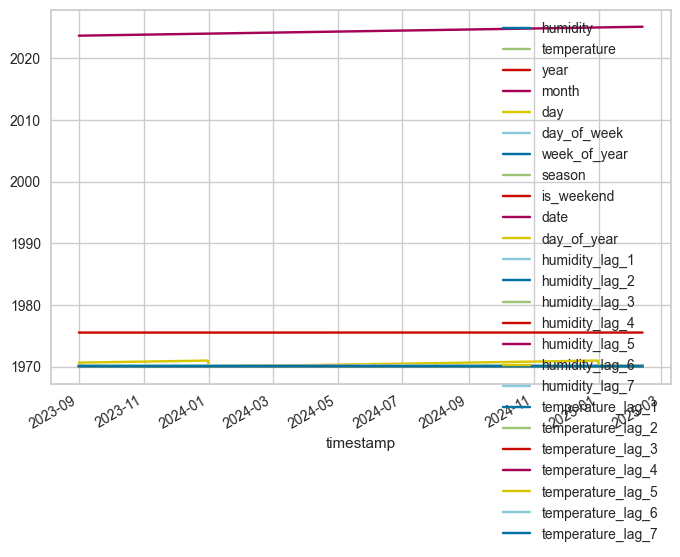

In [44]:
data_filtered.plot()

In [45]:
# สมมติว่า data มีจำนวนวันทั้งหมด
total_data = len(data_filtered)

# จำนวนวันที่ต้องการเป็น test data
test_days = 30

# คำนวณสัดส่วนของ 30 วันในข้อมูลทั้งหมด
test_size = test_days / total_data
test_size

0.05660377358490566

In [46]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_filtered, test_size=test_size, shuffle=False)

In [47]:
train_data.shape

(500, 25)

In [48]:
test_data.shape

(30, 25)

In [49]:
test_data.head(1)

,humidity,temperature,year,month,day,day_of_week,week_of_year,season,is_weekend,date,...,humidity_lag_5,humidity_lag_6,humidity_lag_7,temperature_lag_1,temperature_lag_2,temperature_lag_3,temperature_lag_4,temperature_lag_5,temperature_lag_6,temperature_lag_7
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-01-13 07:00:00,75.720718,24.857799,2025,1,13,0,3,2,0,2025-01-13,...,73.449632,73.350454,85.925103,26.640566,28.05223,28.380074,28.482274,28.022162,27.094928,25.455684


In [50]:
test_data.tail(1)

,humidity,temperature,year,month,day,day_of_week,week_of_year,season,is_weekend,date,...,humidity_lag_5,humidity_lag_6,humidity_lag_7,temperature_lag_1,temperature_lag_2,temperature_lag_3,temperature_lag_4,temperature_lag_5,temperature_lag_6,temperature_lag_7
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-02-11 07:00:00,71.713989,28.029813,2025,2,11,1,7,0,0,2025-02-11,...,70.853854,70.575618,71.844422,28.338313,28.231867,28.104894,28.186164,28.15022,27.676822,27.531455


In [51]:
test_data.columns

Index(['humidity', 'temperature', 'year', 'month', 'day', 'day_of_week',
       'week_of_year', 'season', 'is_weekend', 'date', 'day_of_year',
       'humidity_lag_1', 'humidity_lag_2', 'humidity_lag_3', 'humidity_lag_4',
       'humidity_lag_5', 'humidity_lag_6', 'humidity_lag_7',
       'temperature_lag_1', 'temperature_lag_2', 'temperature_lag_3',
       'temperature_lag_4', 'temperature_lag_5', 'temperature_lag_6',
       'temperature_lag_7'],
      dtype='object')

In [52]:
from pycaret.regression import RegressionExperiment
exp1 = RegressionExperiment()
exp1.setup(data=train_data, target='humidity', session_id=123, fold=12, remove_outliers = True)

,Description,Value
0,Session id,123
1,Target,humidity
2,Target type,Regression
3,Original data shape,"(500, 25)"
4,Transformed data shape,"(482, 27)"
5,Transformed train set shape,"(332, 27)"
6,Transformed test set shape,"(150, 27)"
7,Numeric features,23
8,Date features,1
9,Preprocess,True


In [53]:
# compare baseline models
best = exp1.compare_models(n_select=15)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,1.7562,5.4522,2.2939,0.8954,0.0300,0.0232,0.0192
ridge,Ridge Regression,1.7613,5.4670,2.2995,0.8950,0.0301,0.0232,0.0208
lr,Linear Regression,1.7716,5.5280,2.3115,0.8940,0.0303,0.0234,0.2858
et,Extra Trees Regressor,1.9843,7.0556,2.5876,0.8642,0.0334,0.0260,0.0450
lightgbm,Light Gradient Boosting Machine,2.0259,7.2825,2.6473,0.8603,0.0343,0.0266,0.0567
gbr,Gradient Boosting Regressor,2.0438,7.6474,2.7137,0.8525,0.0353,0.0269,0.0417
rf,Random Forest Regressor,2.2126,8.7819,2.9012,0.8292,0.0375,0.0290,0.0675
ada,AdaBoost Regressor,2.3523,9.5132,3.0278,0.8153,0.0391,0.0308,0.0342
lasso,Lasso Regression,2.3957,9.8793,3.0532,0.8119,0.0393,0.0313,0.0208
llar,Lasso Least Angle Regression,2.4024,9.9319,3.0600,0.8107,0.0394,0.0313,0.0208


In [54]:
model_3 = exp1.create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4493,4.9972,2.2354,0.8968,0.0299,0.0201
1,2.0169,6.6818,2.5849,0.8794,0.0344,0.0272
2,1.7565,4.9309,2.2206,0.9246,0.0292,0.0230
3,2.1203,7.1522,2.6744,0.8896,0.0341,0.0276
4,1.5033,4.3381,2.0828,0.9011,0.0290,0.0208
5,1.4332,3.0416,1.7440,0.9480,0.0233,0.0190
6,1.3089,2.5257,1.5892,0.9605,0.0202,0.0167
7,2.2066,8.5222,2.9193,0.7847,0.0380,0.0290
8,2.1111,7.7879,2.7907,0.8791,0.0349,0.0267


In [ ]:
exp1.evaluate_model(model_3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [56]:
predictions = exp1.predict_model(model_3, data=test_data)
predict_v = predictions['prediction_label']
real = test_data['humidity']

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,2.7694,13.4692,3.6700,0.3524,0.0475,0.0372


In [57]:
# exp1.plot_model(model_2, 'learning')

# ทำนาย 1 วันข้างหน้า ต้องทำนายเผื่อ 2 วัน

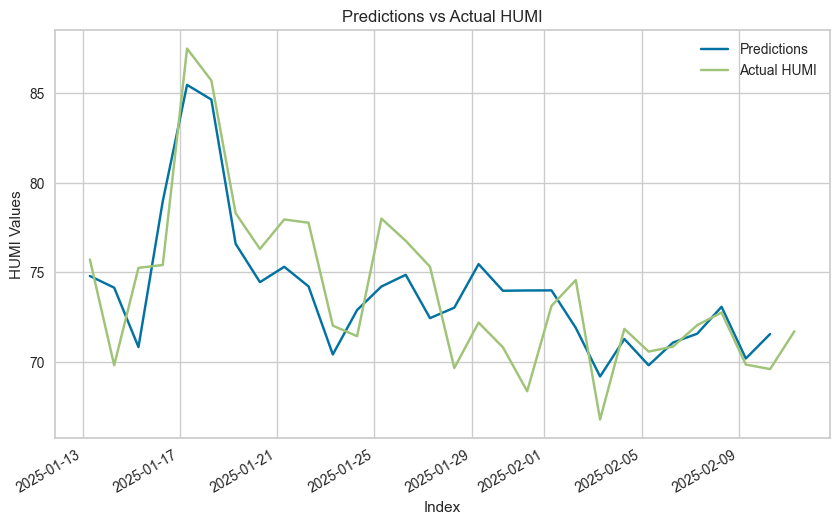

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# สมมุติว่า result คือ DataFrame ที่รวม predictions กับ pm_10
result = pd.concat([predict_v.shift(-1), test_data['humidity']], axis=1)
result.columns = ['Predictions', 'Actual HUMI']  # ตั้งชื่อคอลัมน์

# พล็อตข้อมูล
result.plot(figsize=(10, 6))

# ตั้งชื่อกราฟ
plt.title('Predictions vs Actual HUMI')
plt.xlabel('Index')
plt.ylabel('HUMI Values')

# แสดงกราฟ
plt.show()

In [59]:
len(y_true)

29

In [60]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_true = test_data["humidity"][:"2025-2-10"]
y_pred = predict_v.shift(-1)[:"2025-2-10"]

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate Accuracy as (1 - (MAE / mean_actual)) * 100
mean_actual = np.mean(y_true)  # Mean of actual values
accuracy = (1 - (mae / mean_actual)) * 100  # Accuracy in percentage

# Print Results
print(f"R² Score: {r2:.4f}")  # Closer to 1 is better
print(f"Mean Absolute Error (MAE): {mae:.4f}")  # Lower is better
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")  # Lower is better
print(f"Accuracy: {accuracy:.2f}%")  # Accuracy percentage

R² Score: 0.6822
Mean Absolute Error (MAE): 2.1982
Root Mean Squared Error (RMSE): 2.6042
Accuracy: 97.03%


In [61]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Extract actual values and predicted values
y_true = test_data["humidity"][:7]
y_pred = (predict_v.shift(-1).dropna(axis=0))[:7]

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R² Score: 0.7456
Mean Absolute Error (MAE): 2.5770
Root Mean Squared Error (RMSE): 2.9285
Mean Absolute Percentage Error (MAPE): 3.39%
Accuracy: 96.61%


# Predict 1 by 1

30 วัน  
2025-01-13 07:00:00  
2025-02-11 07:00:00  
7 วัน  
2025-02-05  
2025-02-11  
24 วัน  
2025-01-19 07:00:00  
31 วัน
2025-01-12 07:00:00

In [62]:
data_compare = data_filtered.loc[:'2025-01-12']
result = pd.DataFrame()

start_date = "2025-01-13"
end_date = "2025-02-11"

model = model_3

for date in pd.date_range(start=start_date, end=end_date, freq="D"):
    # Drop columns
    test_1 = data_filtered
    # ดึงวันนี้มา
    test_1 = test_1.loc[str(date.date())]

    # ใส่เข้าไป
    data_compare = pd.concat([data_compare, test_1], axis=0)

    # เพิ่มฟีเจอร์ rolling average (ค่าเฉลี่ยเคลื่อนที่)

    # data_compare['pm_2_5_rolling_7'] = data_compare['pm_2_5'].rolling(window=7).mean().shift(1)  # ค่าเฉลี่ย 5 วันของ PM 10

    for i in range(1,lag_size+1):
        data_compare[f'humidity_lag_{i}'] = data_compare['humidity'].shift(i)

    # ดึง
    test_1 = (data_compare.loc[str(date.date())]).drop(columns=['humidity'])
    
    # Drop ทิ้งล่าสุดใน data_compare
    data_compare = data_compare.drop(data_compare.last_valid_index())
    test_1 = test_1[~test_1.index.duplicated(keep='last')]

    # Predict
    predict_test_1 = exp1.predict_model(model, data=test_1)

    # เพิ่มผลทำนายเข้าไปใน data_compare
    data_compare = pd.concat([data_compare, predict_test_1], axis=0)

    # แทนที่ค่าในคอลัมน์ 'pm_2_5' ในวันที่ '2025-01-13' ด้วยค่าในคอลัมน์ 'prediction_label'
    data_compare.loc[str(date.date()), 'humidity'] = data_compare.loc[str(date.date()), 'prediction_label']

    # ลบคอลัมน์ 'prediction_label' (หากต้องการแค่ผลทำนาย)
    data_compare = data_compare.drop(columns=['prediction_label'])

    # กรองเอาวันที่ซ้ำกัน (index ซ้ำ) ออกให้เหลือแค่ตัวเดียว
    data_compare = data_compare[~data_compare.index.duplicated(keep='last')]

    # บันทึกลง result
    result = pd.concat([result, predict_test_1], axis=0)

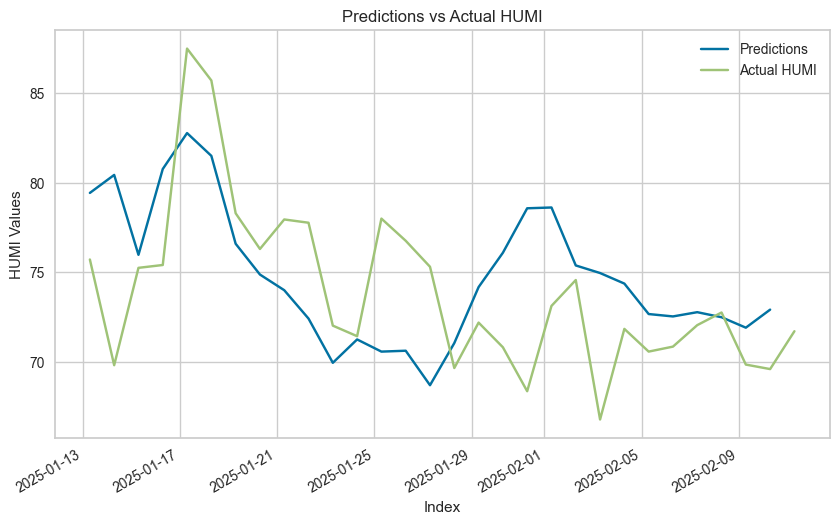

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

real_data = data_filtered.loc[start_date:end_date]
# สมมุติว่า result คือ DataFrame ที่รวม predictions กับ pm_10
result_plot = pd.concat([result['prediction_label'].shift(-1), real_data['humidity']], axis=1)
result_plot.columns = ['Predictions', 'Actual HUMI']  # ตั้งชื่อคอลัมน์

# พล็อตข้อมูล
result_plot.plot(figsize=(10, 6))

# ตั้งชื่อกราฟ
plt.title('Predictions vs Actual HUMI')
plt.xlabel('Index')
plt.ylabel('HUMI Values')

# แสดงกราฟ
plt.show()

In [64]:
y_true = test_data["humidity"][:"2025-2-10"]
y_pred = result['prediction_label'].shift(-1).dropna(axis=0)

In [65]:
y_true = test_data["humidity"][:7]
y_pred = (result['prediction_label'].shift(-1).dropna(axis=0))[:7]

In [66]:
# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R² Score: 0.1567
Mean Absolute Error (MAE): 4.4390
Root Mean Squared Error (RMSE): 5.3321
Mean Absolute Percentage Error (MAPE): 5.81%
Accuracy: 94.19%
